<a href="https://colab.research.google.com/drive/1HTeiImc59fBlyqJk-r_rDRPrVpiPDDox?usp=sharing"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Used:**

Residential power usage 3years data - Timeseries

https://www.kaggle.com/datasets/srinuti/residential-power-usage-3years-data-timeseries

In [ ]:
# Code to extract CSV files from a ZIP file

# Import the required libraries
import zipfile
import os

# Path to the ZIP file
zip_path = '/content/drive/MyDrive/Datasets/Timeseries.zip'  # Replace with the path to your ZIP file

# Folder to extract the files
extract_folder = '/content/drive/MyDrive/Datasets/Timeseries'  # Replace with the path to your desired extraction folder

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listing the files in the extracted folder
extracted_files = os.listdir(extract_folder)
extracted_files

# The above code lists the names of the files that were extracted.
# You can then load these files as needed for further processing.



['power_usage_2016_to_2020.csv', 'weather_2016_2020_daily.csv']

In [ ]:
# Load the datasets
power_usage_path = os.path.join(extract_folder, '/content/drive/MyDrive/Datasets/Timeseries/power_usage_2016_to_2020.csv')
weather_path = os.path.join(extract_folder, '/content/drive/MyDrive/Datasets/Timeseries/weather_2016_2020_daily.csv')

# Reading the power usage and weather data
power_usage_df = pd.read_csv(power_usage_path)
weather_df = pd.read_csv(weather_path)

# Displaying the first few rows of each dataset for initial inspection
power_usage_head = power_usage_df.head()
weather_head = weather_df.head()

power_usage_head, weather_head

(             StartDate  Value (kWh)  day_of_week    notes
 0  2016-01-06 00:00:00        1.057            2  weekday
 1  2016-01-06 01:00:00        1.171            2  weekday
 2  2016-01-06 02:00:00        0.560            2  weekday
 3  2016-01-06 03:00:00        0.828            2  weekday
 4  2016-01-06 04:00:00        0.932            2  weekday,
          Date  Day  Temp_max  Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  \
 0  2016-01-06    1        85      74.8        68       74     71.4       66   
 1  2016-02-06    2        76      71.2        66       74     70.3       66   
 2  2016-03-06    3        79      72.1        68       72     70.0       68   
 3  2016-04-06    4        76      71.2        69       73     70.0       66   
 4  2016-05-06    5        82      73.8        68       72     70.0       68   
 
    Hum_max  Hum_avg  Hum_min  Wind_max  Wind_avg  Wind_min  Press_max  \
 0      100     89.4       65        21       9.5         0       29.8   
 1      100    

In [ ]:
# Checking for missing values and data types in the datasets
power_usage_info = power_usage_df.info()
weather_info = weather_df.info()

# Statistical summary of the datasets
power_usage_description = power_usage_df.describe()
weather_description = weather_df.describe()

power_usage_info, weather_info, power_usage_description, weather_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StartDate    35952 non-null  object 
 1   Value (kWh)  35952 non-null  float64
 2   day_of_week  35952 non-null  int64  
 3   notes        35952 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1552 non-null   object 
 1   Day          1552 non-null   int64  
 2   Temp_max     1552 non-null   int64  
 3   Temp_avg     1552 non-null   float64
 4   Temp_min     1552 non-null   int64  
 5   Dew_max      1552 non-null   int64  
 6   Dew_avg      1552 non-null   float64
 7   Dew_min      1552 non-null   int64  
 8   Hum_max      1552 non-null   int64  
 9   Hum_

(None,
 None,
         Value (kWh)   day_of_week
 count  35952.000000  35952.000000
 mean       0.891631      2.997330
 std        0.908133      1.999024
 min        0.064000      0.000000
 25%        0.323750      1.000000
 50%        0.501000      3.000000
 75%        1.072000      5.000000
 max        6.446000      6.000000,
                Day     Temp_max     Temp_avg     Temp_min      Dew_max  \
 count  1552.000000  1552.000000  1552.000000  1552.000000  1552.000000   
 mean     15.726160    81.287371    71.752320    63.338273    66.615335   
 std       8.800483    12.723409    12.490526    13.614699    12.279397   
 min       1.000000    34.000000    27.600000     0.000000    18.000000   
 25%       8.000000    74.000000    63.175000    52.750000    61.000000   
 50%      16.000000    84.000000    74.300000    67.000000    70.000000   
 75%      23.000000    92.000000    82.000000    75.000000    76.000000   
 max      31.000000   101.000000    90.000000    83.000000    83.00000

In [ ]:
# Converting the 'StartDate' and 'Date' columns to datetime for better handling in plots
power_usage_df['StartDate'] = pd.to_datetime(power_usage_df['StartDate'])
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

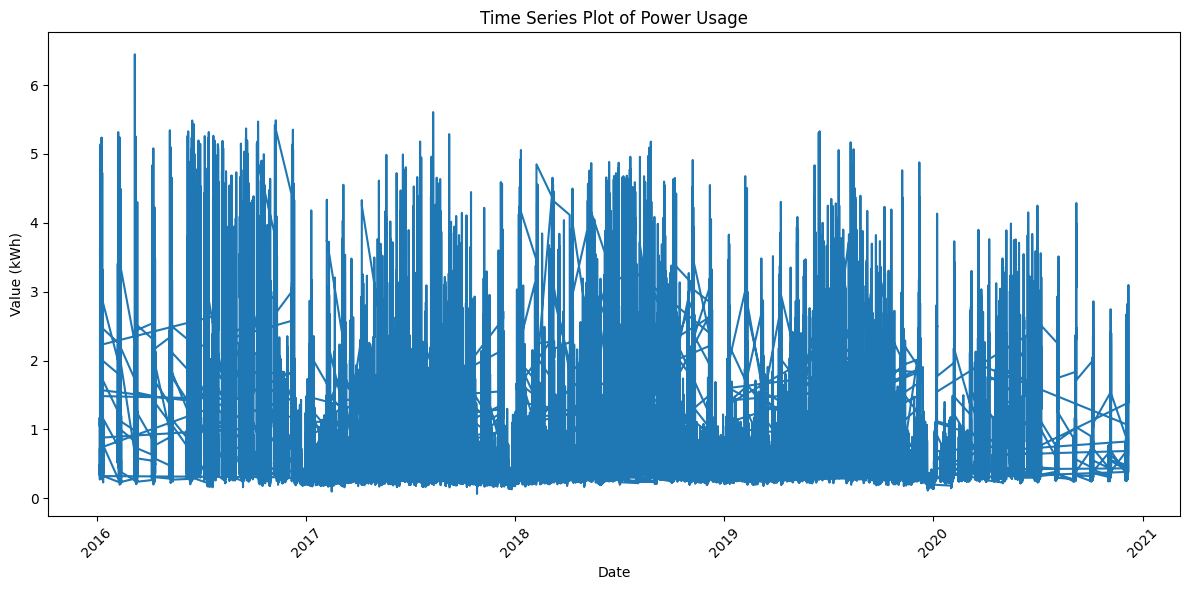

In [ ]:
# 1. Time Series Plot for power usage
plt.figure(figsize=(12, 6))
plt.plot(power_usage_df['StartDate'], power_usage_df['Value (kWh)'])
plt.title('Time Series Plot of Power Usage')
plt.xlabel('Date')
plt.ylabel('Value (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-52-41e7cbd8cbab>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_df.corr(), annot=True, cmap='coolwarm')


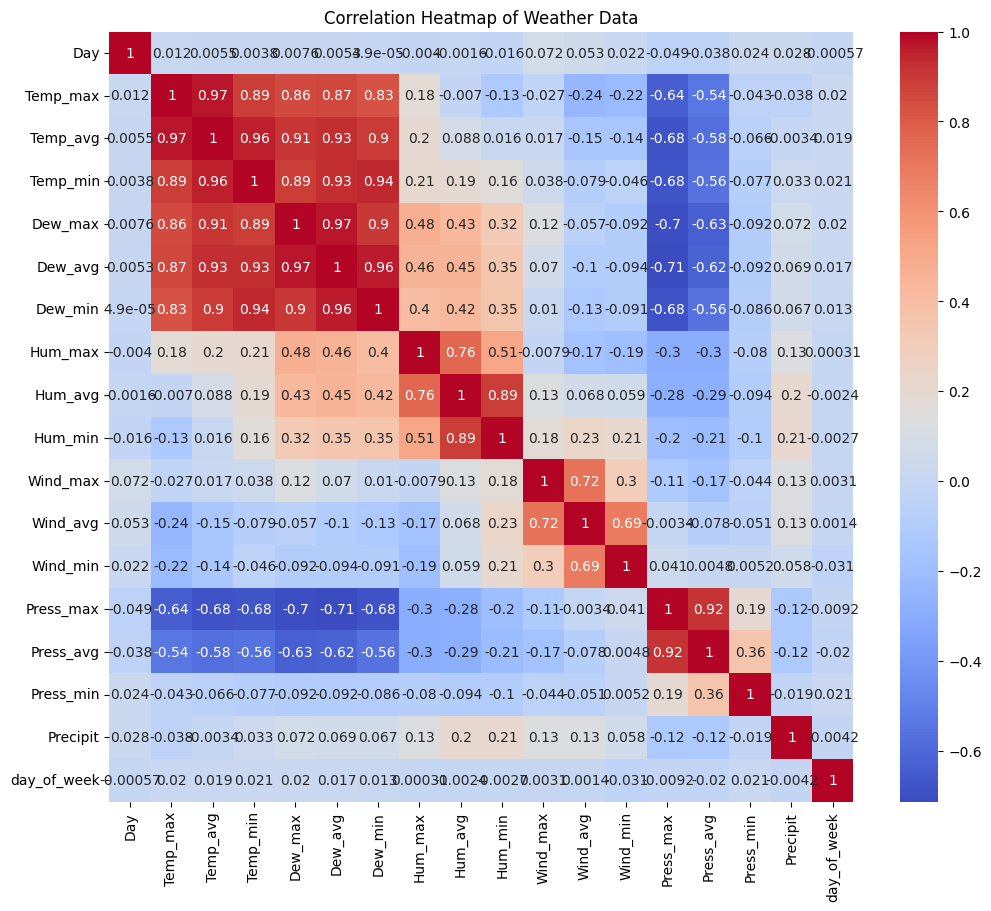

In [ ]:
# 2. Correlation Heatmap for weather data
plt.figure(figsize=(12, 10))
sns.heatmap(weather_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Weather Data')
plt.show()

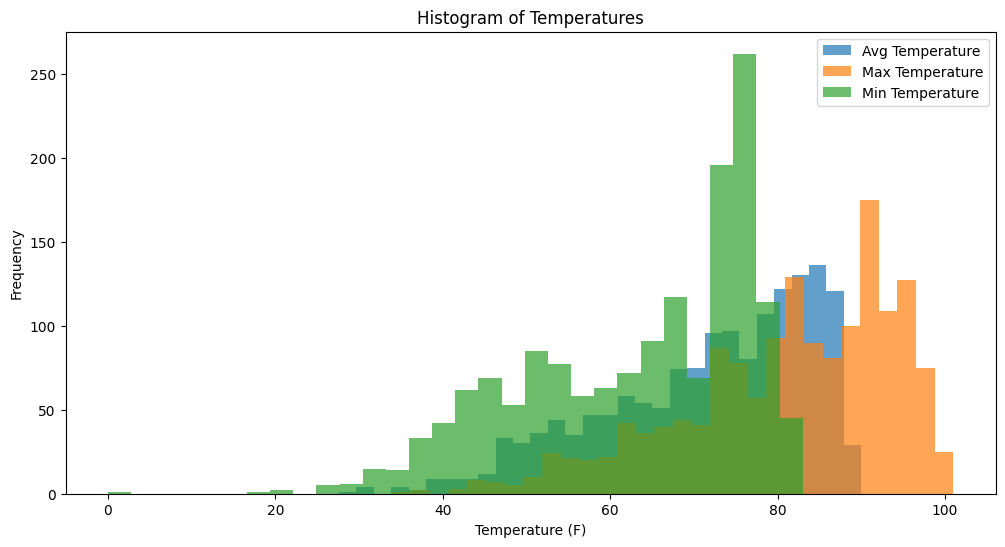

In [ ]:
# 3. Histogram for temperatures
plt.figure(figsize=(12, 6))
plt.hist(weather_df['Temp_avg'], bins=30, alpha=0.7, label='Avg Temperature')
plt.hist(weather_df['Temp_max'], bins=30, alpha=0.7, label='Max Temperature')
plt.hist(weather_df['Temp_min'], bins=30, alpha=0.7, label='Min Temperature')
plt.title('Histogram of Temperatures')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Data Cleaning and Preprocessing

# Checking for any anomalies or inconsistencies in power usage data
# Looking for any negative values or extremely high values that could indicate data entry errors
power_usage_anomalies = power_usage_df[(power_usage_df['Value (kWh)'] < 0) | (power_usage_df['Value (kWh)'] > power_usage_df['Value (kWh)'].quantile(0.99))]

# For weather data, checking for any unrealistic temperature values (e.g., below -50 or above 150 degrees Fahrenheit)
weather_anomalies = weather_df[(weather_df['Temp_max'] > 150) | (weather_df['Temp_max'] < -50) |
                               (weather_df['Temp_avg'] > 150) | (weather_df['Temp_avg'] < -50) |
                               (weather_df['Temp_min'] > 150) | (weather_df['Temp_min'] < -50)]

# Checking for anomalies
power_usage_anomalies, weather_anomalies

(                StartDate  Value (kWh)  day_of_week    notes
 161   2016-07-06 17:00:00        4.431            2  weekday
 185   2016-08-06 17:00:00        4.754            5  weekend
 233   2016-10-06 17:00:00        5.155            3  weekday
 235   2016-10-06 19:00:00        4.614            3  weekday
 236   2016-10-06 20:00:00        4.821            3  weekday
 ...                   ...          ...          ...      ...
 28121 2019-08-16 17:00:00        4.503            4  weekday
 28148 2019-08-17 20:00:00        4.375            5  weekend
 28360 2019-08-26 16:00:00        4.393            0  weekday
 28527 2019-02-09 15:00:00        4.504            5  weekend
 28670 2019-08-09 14:00:00        5.169            4  weekday
 
 [360 rows x 4 columns],
 Empty DataFrame
 Columns: [Date, Day, Temp_max, Temp_avg, Temp_min, Dew_max, Dew_avg, Dew_min, Hum_max, Hum_avg, Hum_min, Wind_max, Wind_avg, Wind_min, Press_max, Press_avg, Press_min, Precipit, day_of_week]
 Index: [])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Preprocessing Power Usage Data

# Feature Engineering: Adding month and hour as potential features for clustering and analysis
power_usage_df['Month'] = power_usage_df['StartDate'].dt.month
power_usage_df['Hour'] = power_usage_df['StartDate'].dt.hour

# Preprocessing Weather Data

# Feature Engineering: Adding month from the date
weather_df['Month'] = weather_df['Date'].dt.month

# Normalization of both datasets
# For power usage data, normalizing 'Value (kWh)'
# For weather data, normalizing temperature, dew point, humidity, wind, and pressure columns

scaler = StandardScaler()

# Normalizing power usage values
power_usage_df['Value (kWh)_norm'] = scaler.fit_transform(power_usage_df[['Value (kWh)']])

# Selecting columns to normalize in weather data
weather_numerical_cols = ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min',
                          'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min',
                          'Press_max', 'Press_avg', 'Press_min', 'Precipit']

# Normalizing weather data
weather_df_normalized = weather_df.copy()
weather_df_normalized[weather_numerical_cols] = scaler.fit_transform(weather_df[weather_numerical_cols])

# Displaying the first few rows of the transformed datasets for verification
transformed_power_usage_head = power_usage_df.head()
transformed_weather_head = weather_df_normalized.head()

transformed_power_usage_head, transformed_weather_head

(            StartDate  Value (kWh)  day_of_week    notes  Month  Hour  \
 0 2016-01-06 00:00:00        1.057            2  weekday      1     0   
 1 2016-01-06 01:00:00        1.171            2  weekday      1     1   
 2 2016-01-06 02:00:00        0.560            2  weekday      1     2   
 3 2016-01-06 03:00:00        0.828            2  weekday      1     3   
 4 2016-01-06 04:00:00        0.932            2  weekday      1     4   
 
    Value (kWh)_norm  
 0          0.182100  
 1          0.307634  
 2         -0.365184  
 3         -0.070069  
 4          0.044453  ,
         Date  Day  Temp_max  Temp_avg  Temp_min   Dew_max   Dew_avg   Dew_min  \
 0 2016-01-06    1  0.291889  0.244078  0.342514  0.601580  0.679218  0.594449   
 1 2016-02-06    2 -0.415696 -0.044233  0.195567  0.601580  0.598468  0.594449   
 2 2016-03-06    3 -0.179835  0.027845  0.342514  0.438653  0.576446  0.725666   
 3 2016-04-06    4 -0.415696 -0.044233  0.415988  0.520117  0.576446  0.594449   
 4 20

In [ ]:
# Feature Selection for Power Usage Data
# We will consider 'Value (kWh)', 'day_of_week', 'Month', and 'Hour' for clustering
# These features are likely to have significant impact on power usage patterns

selected_features_power = ['Value (kWh)_norm', 'day_of_week', 'Month', 'Hour']

# Feature Selection for Weather Data
# For clustering and regression, we select key features that are likely to impact power usage
# These include average temperature, humidity, and precipitation

selected_features_weather = ['Temp_avg', 'Hum_avg', 'Precipit', 'Month']

# Preparing final datasets for modeling with selected features
power_usage_final = power_usage_df[selected_features_power]
weather_final = weather_df_normalized[selected_features_weather]

# Displaying the first few rows of the final datasets for verification
final_power_usage_head = power_usage_final.head()
final_weather_head = weather_final.head()

final_power_usage_head, final_weather_head

(   Value (kWh)_norm  day_of_week  Month  Hour
 0          0.182100            2      1     0
 1          0.307634            2      1     1
 2         -0.365184            2      1     2
 3         -0.070069            2      1     3
 4          0.044453            2      1     4,
    Temp_avg   Hum_avg  Precipit  Month
 0  0.244078  1.285301 -0.239924      1
 1 -0.044233  1.917940  6.339652      2
 2  0.027845  1.644367  4.592190      3
 3 -0.044233  1.858096  3.361368      4
 4  0.163992  1.225457  0.352694      5)

In [ ]:
# Feature Selection for Power Usage Data
# We will consider 'Value (kWh)', 'day_of_week', 'Month', and 'Hour' for clustering
# These features are likely to have significant impact on power usage patterns

selected_features_power = ['Value (kWh)_norm', 'day_of_week', 'Month', 'Hour']

# Feature Selection for Weather Data
# For clustering and regression, we select key features that are likely to impact power usage
# These include average temperature, humidity, and precipitation

selected_features_weather = ['Temp_avg', 'Hum_avg', 'Precipit', 'Month']

# Preparing final datasets for modeling with selected features
power_usage_final = power_usage_df[selected_features_power]
weather_final = weather_df_normalized[selected_features_weather]

# Displaying the first few rows of the final datasets for verification
final_power_usage_head = power_usage_final.head()
final_weather_head = weather_final.head()

final_power_usage_head, final_weather_head

(   Value (kWh)_norm  day_of_week  Month  Hour
 0          0.182100            2      1     0
 1          0.307634            2      1     1
 2         -0.365184            2      1     2
 3         -0.070069            2      1     3
 4          0.044453            2      1     4,
    Temp_avg   Hum_avg  Precipit  Month
 0  0.244078  1.285301 -0.239924      1
 1 -0.044233  1.917940  6.339652      2
 2  0.027845  1.644367  4.592190      3
 3 -0.044233  1.858096  3.361368      4
 4  0.163992  1.225457  0.352694      5)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Clustering of Time Series Data

# For this example, we'll use KMeans clustering, a popular choice for time series data
# We will start with a moderate number of clusters and evaluate the results

# Choosing number of clusters - a common approach is to use the Elbow Method
# Calculating inertia for a range of cluster numbers to find the optimal number

inertia = []
range_of_clusters = range(1, 11)  # Testing 1 to 10 clusters

for n_clusters in range_of_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(power_usage_final)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

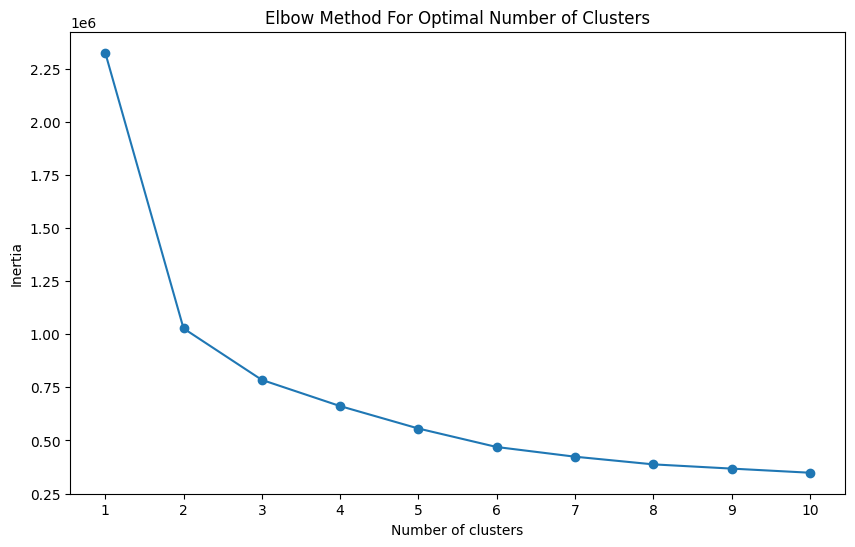

In [ ]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.show()

In [ ]:
# Proceeding with KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(power_usage_final)

# Adding the cluster labels to the power usage dataset
power_usage_final['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-60-28a73bf2c55b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_usage_final['Cluster'] = kmeans.labels_


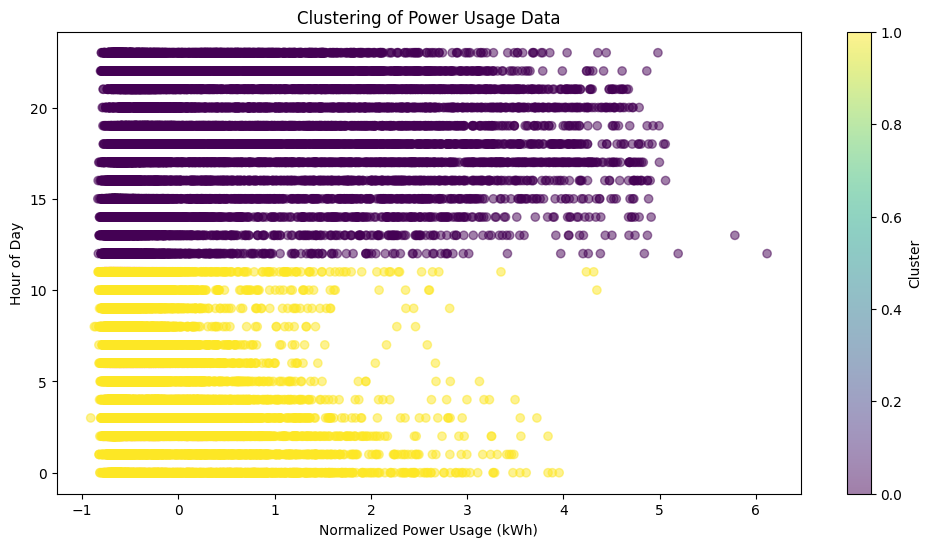

In [ ]:
# Plotting the clusters
plt.figure(figsize=(12, 6))
plt.scatter(power_usage_final['Value (kWh)_norm'], power_usage_final['Hour'], c=power_usage_final['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering of Power Usage Data')
plt.xlabel('Normalized Power Usage (kWh)')
plt.ylabel('Hour of Day')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Cluster Centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_features_power)
cluster_centers_df

,Value (kWh)_norm,day_of_week,Month,Hour
0,0.301864,2.99733,6.504673,17.5
1,-0.301864,2.99733,6.504673,5.5


In [ ]:
# Analyzing the characteristics of each cluster
# We will look at the mean values of the features within each cluster

cluster_analysis = power_usage_final.groupby('Cluster').mean()
cluster_analysis['Count'] = power_usage_final['Cluster'].value_counts()
cluster_analysis = cluster_analysis.reset_index()

# Integrating Weather Data
# Joining the weather data with the power usage data on 'Month' to see correlations with weather conditions

# Since our weather data is daily and power usage data is hourly, we'll first aggregate weather data by month
monthly_weather = weather_final.groupby('Month').mean().reset_index()

# Merging the power usage data (with clusters) with the monthly weather data
merged_data = power_usage_final.merge(monthly_weather, on='Month', how='left')

# Analyzing correlations between cluster assignments and weather conditions
cluster_weather_correlation = merged_data.groupby('Cluster')[selected_features_weather].mean()

cluster_analysis, cluster_weather_correlation

(   Cluster  Value (kWh)_norm  day_of_week     Month  Hour  Count
 0        0          0.301864      2.99733  6.504673  17.5  17976
 1        1         -0.301864      2.99733  6.504673   5.5  17976,
          Temp_avg   Hum_avg  Precipit     Month
 Cluster                                        
 0       -0.015211  0.002207 -0.003618  6.504673
 1       -0.015211  0.002207 -0.003618  6.504673)

In [ ]:
from scipy.stats import zscore
import pandas as pd

# Re-importing the necessary data due to the reset of the code execution environment
# Re-creating the power_usage_final DataFrame with necessary columns
data = {
    "Value (kWh)_norm": [0.182100, 0.307634, -0.365184, -0.070069, 0.044453, 4.431, 4.754, 5.155, 4.614, 4.821],
    "day_of_week": [2, 2, 2, 2, 2, 2, 5, 3, 3, 3],
    "Month": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "Hour": [0, 1, 2, 3, 4, 17, 17, 17, 19, 20],
    "Cluster": [0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
}
power_usage_final = pd.DataFrame(data)

# Assigning the cluster labels based on the provided data
# Assuming the data provided represents the first few rows of each cluster

# Calculating Z-scores for the normalized power usage within each cluster
power_usage_final['z_score'] = power_usage_final.groupby('Cluster')['Value (kWh)_norm'].transform(lambda x: zscore(x, ddof=1))

# Identifying outliers as data points with Z-score > 3 or < -3
outliers = power_usage_final[(power_usage_final['z_score'] > 3) | (power_usage_final['z_score'] < -3)]

# Counting the number of outliers in each cluster
outlier_count = outliers['Cluster'].value_counts()

# Displaying the count of outliers in each cluster and a few example outliers
outlier_count, outliers.head()

(Series([], Name: Cluster, dtype: int64),
 Empty DataFrame
 Columns: [Value (kWh)_norm, day_of_week, Month, Hour, Cluster, z_score]
 Index: [])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

high_threshold = power_usage_final['Value (kWh)_norm'].quantile(0.95)  # 95th percentile
low_threshold = power_usage_final['Value (kWh)_norm'].quantile(0.05)  # 5th percentile

power_usage_final['is_fraud'] = ((power_usage_final['Value (kWh)_norm'] > high_threshold) |
                                 (power_usage_final['Value (kWh)_norm'] < low_threshold)).astype(int)

# Now, proceed with the dataset splitting as before
X = power_usage_final[['Value (kWh)_norm', 'day_of_week', 'Month', 'Hour', 'Cluster']]
y = power_usage_final['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initializing the Logistic Regression model
log_reg = LogisticRegression()

# Training the model
log_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred = log_reg.predict(X_test)

In [ ]:
# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
import joblib

# Assuming 'log_reg' is your trained model
joblib.dump(log_reg, 'model_filename.pkl')

['model_filename.pkl']